In [1]:
using Pkg
Pkg.activate(".")
using PGFPlotsX, Colors
using CSV, DataFrames

  Activating project at `~/Projects/plots-with-julia`


In [12]:
myblue = parse(Colorant, "cornflower blue")
myred = parse(Colorant, "light coral");

# Grid without any axis

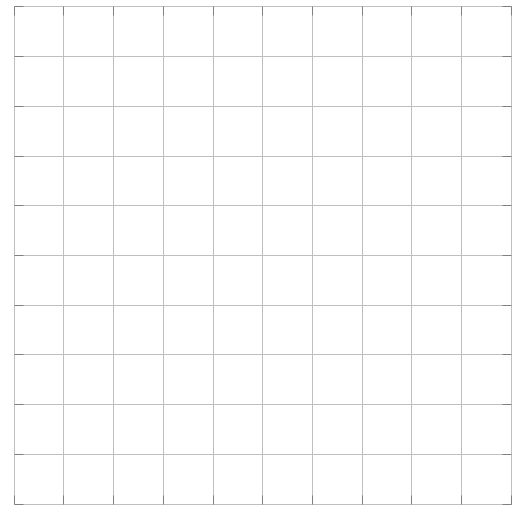

In [13]:
ax = @pgf Axis(
{
    xmin = -5, xmax = 5, ymin = -5, ymax = 5,
    xtick = -5:1:5, ytick = -5:1:5,
    xticklabels= "",
    yticklabels= "",
    minor_tick_num = 0, # amount of grid lines between two major grid lines
    grid = "both", # grid = "both" draws major and minor grid!
    axis_line_style = "draw=none",
    width = "10cm" , height = "10cm",
    }
)

# Grid with additional gridlines

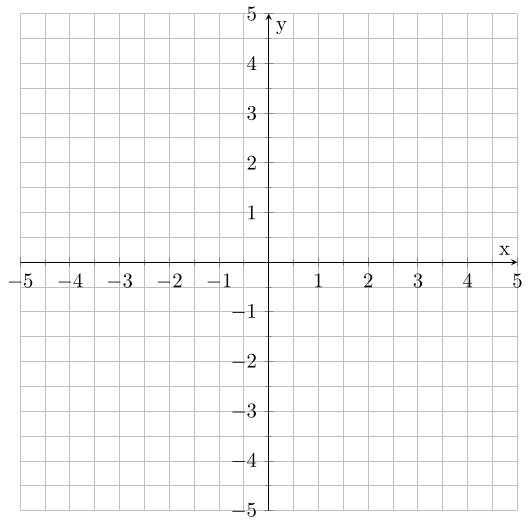

In [14]:
ax = @pgf Axis(
{
    xlabel = "x", ylabel = "y",
    xmin = -5, xmax = 5, ymin = -5, ymax = 5,
    xtick = -5:1:5, ytick = -5:1:5,
    minor_tick_num = 1, # amount of grid lines between two major grid lines
    axis_lines = "center", grid = "both", # grid = "both" draws major and minor grid!
    width = "10cm" , height = "10cm",
    }
)

# Line plot with center axis

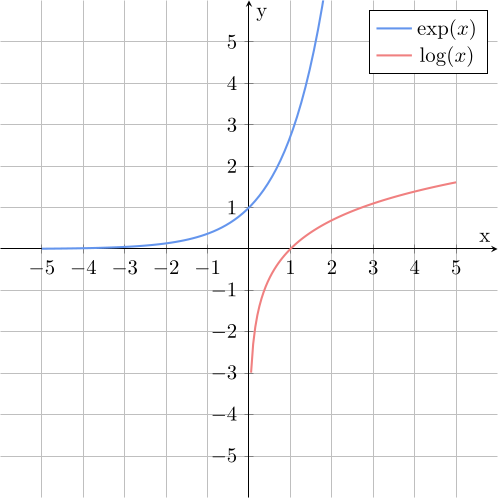

In [17]:
xs = range(-5, 5, 100)
xs1 = range(0, 5, 100)
ax = @pgf Axis(
{
    xlabel = "x", ylabel = "y",
    xmin = -6, xmax = 6, ymin = -6, ymax = 6,
    xtick = -5:1:5, ytick = -5:1:5,
    axis_lines = "middle", grid = "major",
    width = "10cm" , height = "10cm",
    }
)

pexp = @pgf Plot({line_width = 1, color = myblue}, Coordinates(xs, exp.(xs)) )
plog = @pgf Plot({line_width = 1, color = myred}, Coordinates(xs1, log.(xs1)) )
lexp = LegendEntry(raw"$\exp(x)$")
llog = LegendEntry(raw"$\log(x)$")
push!(ax, lexp)
push!(ax, pexp)
push!(ax, llog)
push!(ax, plog)

# Barplot for physics data

In [30]:
df = CSV.read("data/events.csv", DataFrame) |> DataFrame;
first(df, 5)

Row,n_tanks,n_events,mean_energies
,Int64,Int64,Float64
1,9,1,3.22954
2,11,3,3.24581
3,12,14,3.35929
4,13,136,3.44467
5,14,530,3.66377


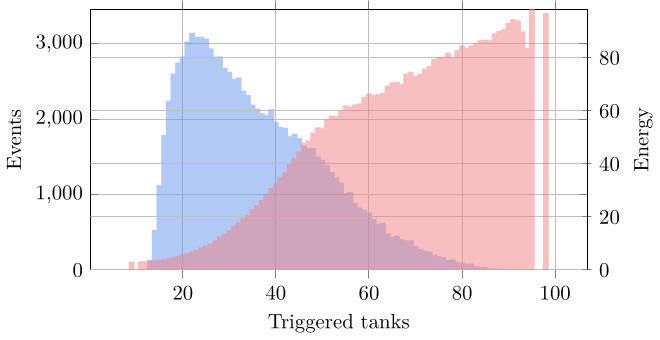

In [70]:
ax = @pgf Axis(
{
    ybar, bar_width="0.1cm",
    ymin = 0,
    xlabel = "Triggered tanks", ylabel = "Events",
    grid = "major",
    width = "10cm" , height = "6cm",
  }
)
p = @pgf Plot({draw="none", fill=myblue, fill_opacity=0.5}, Coordinates(df.n_tanks, df.n_events))
push!(ax, p)

ax1 = @pgf Axis(
{
    axis_x_line = "none",
    axis_y_line = "right",
    y_axis_line_style = "-",
    ymin=0,
    ybar = "true", bar_width="0.1cm",
    ylabel = "Energy",
    grid = "major",
    width = "10cm" , height = "6cm",
  }
)    
p = @pgf Plot({draw="none", fill=myred, fill_opacity=0.5}, Coordinates(df.n_tanks, df.mean_energies))
push!(ax1, p)


tp = @pgf TikzPicture(ax, ax1)